### Adult Census Income
##### Predict whether income exceeds $50K/yr based on census data.

Some of the variables are not self-explanatory. The continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents. The variable education_num stands for the number of years of education in total, which is a continuous representation of the discrete variable education. The variable relationship represents the responding unit’s role in the family. capital_gain and capital_loss are income from investment sources other than wage/salary.

In [1]:
## import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Get Data

In [2]:
## import datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
## look at first 5 records
df_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


## EDA

In [4]:
## size of train_data
df_train.shape

(43957, 15)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [6]:
## check for uniqueness
for col in list(df_train.columns):
    print(f"{col} --> {df_train[col].nunique()}")

age --> 74
workclass --> 8
fnlwgt --> 26646
education --> 16
educational-num --> 16
marital-status --> 7
occupation --> 14
relationship --> 6
race --> 5
gender --> 2
capital-gain --> 122
capital-loss --> 97
hours-per-week --> 94
native-country --> 41
income_>50K --> 2


In [7]:
## Check for missing values
df_train.isna().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

<AxesSubplot:>

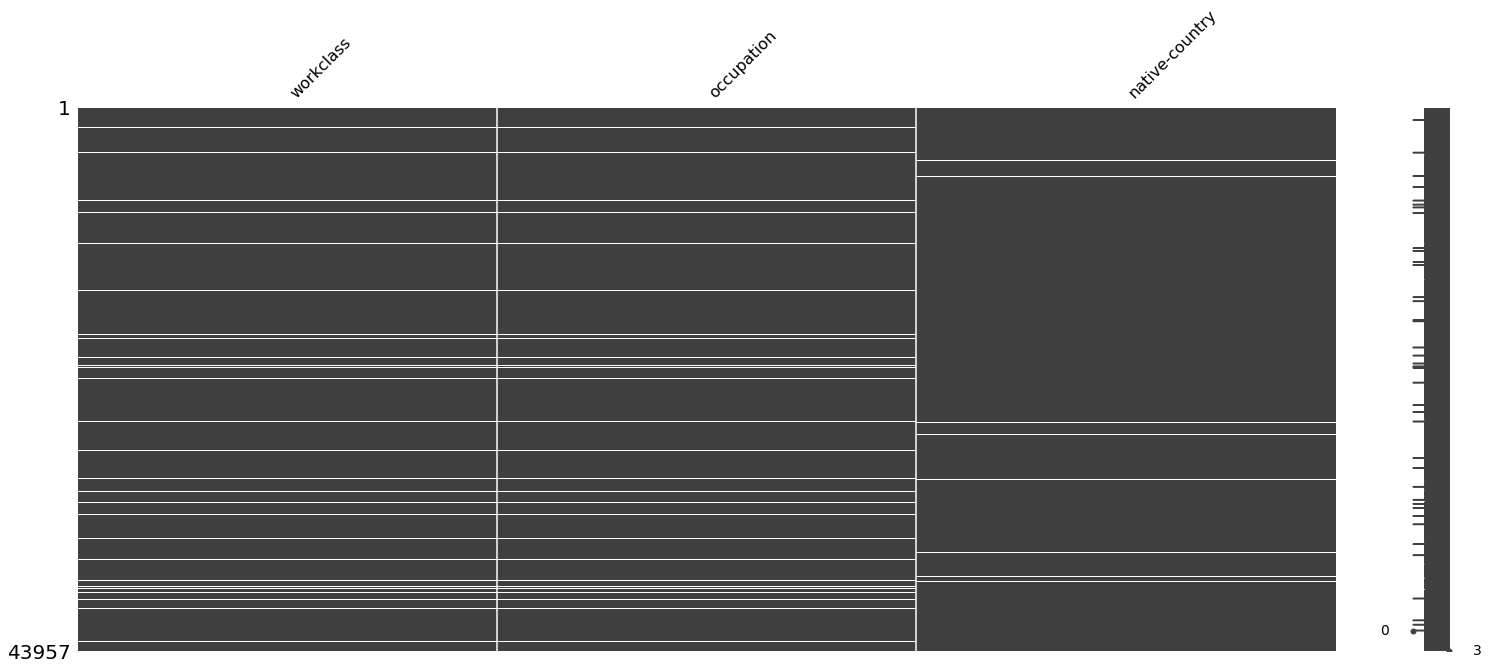

In [8]:
## Check for any patterns in missingness
msno.matrix(df_train[['workclass','occupation', 'native-country']])

In [9]:
df_train[df_train['workclass'].isna() & df_train['occupation'].isna()].head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
33,20,NaN,249087,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,40,United-States,0
48,19,NaN,174233,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,24,United-States,0
67,66,NaN,117778,11th,7,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,0
82,47,NaN,215620,HS-grad,9,Never-married,NaN,Not-in-family,White,Male,0,0,12,United-States,0
88,20,NaN,432376,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,Germany,0


In [10]:
df_train.duplicated().sum()

45

In [11]:
df_train[df_train.duplicated()].head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
1650,29,NaN,41281,Bachelors,13,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,50,United-States,0
6915,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,0
8362,19,Private,318822,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
12669,22,Private,137876,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,20,United-States,0
13408,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0


In [12]:
df_train.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


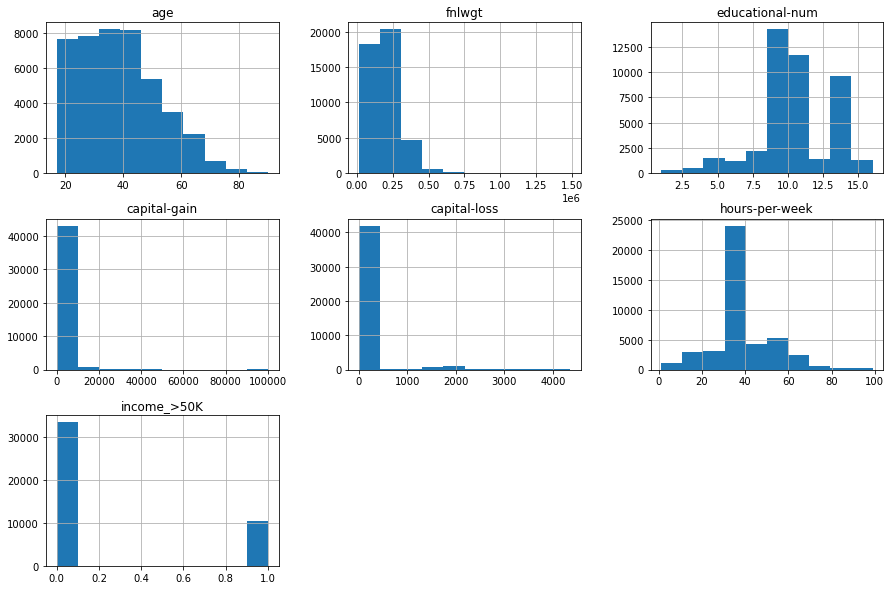

In [13]:
## check the distribution for numerical variables
df_train.hist(figsize=(15, 10))
plt.show()

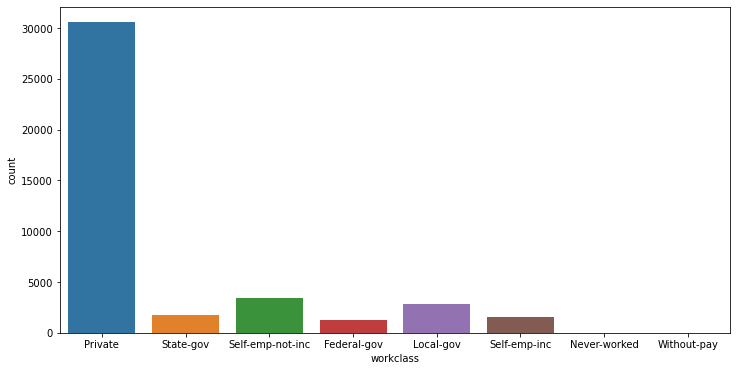

In [14]:
plt.figure(figsize = (12,6))
sns.countplot(x='workclass', data=df_train)
plt.show()

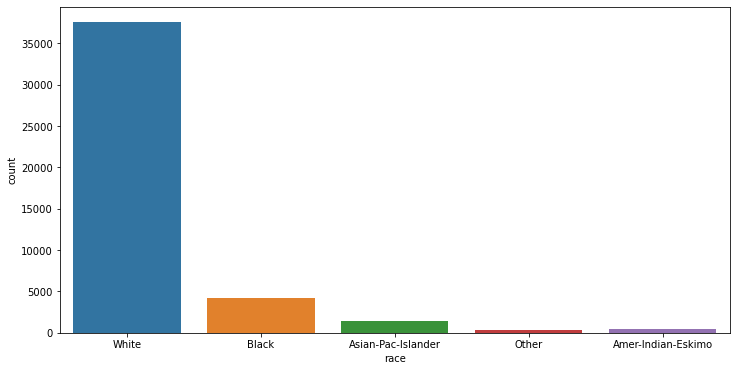

In [15]:
plt.figure(figsize = (12,6))
sns.countplot(x='race', data=df_train)
plt.show()

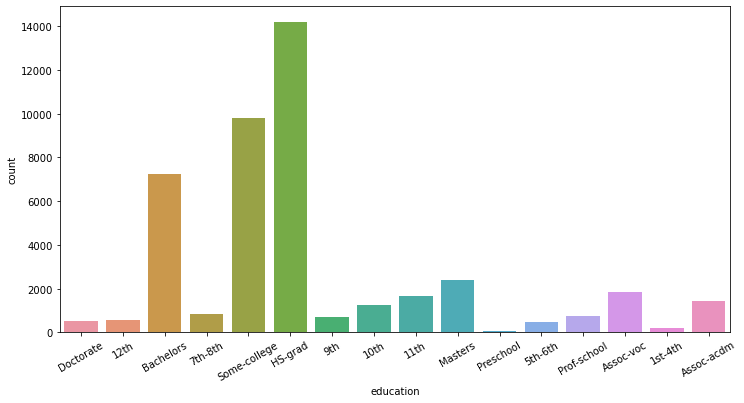

In [16]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x='education', data=df_train)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

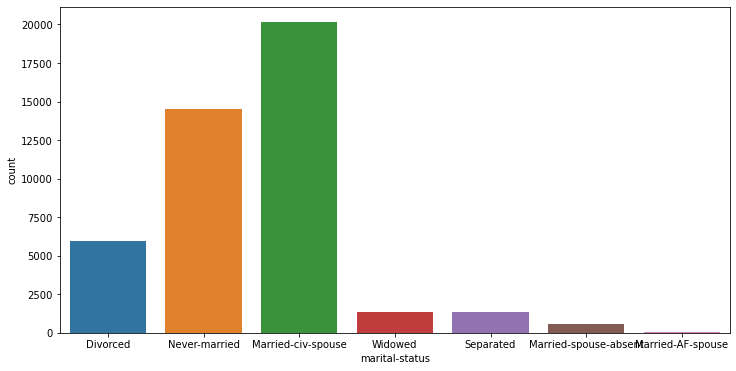

In [17]:
plt.figure(figsize = (12,6))
sns.countplot(x='marital-status', data=df_train)
plt.show()

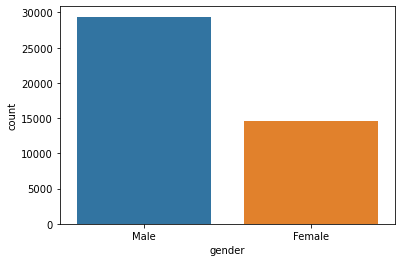

In [18]:
plt.figure(figsize = (6,4))
sns.countplot(x='gender', data=df_train)
plt.show()

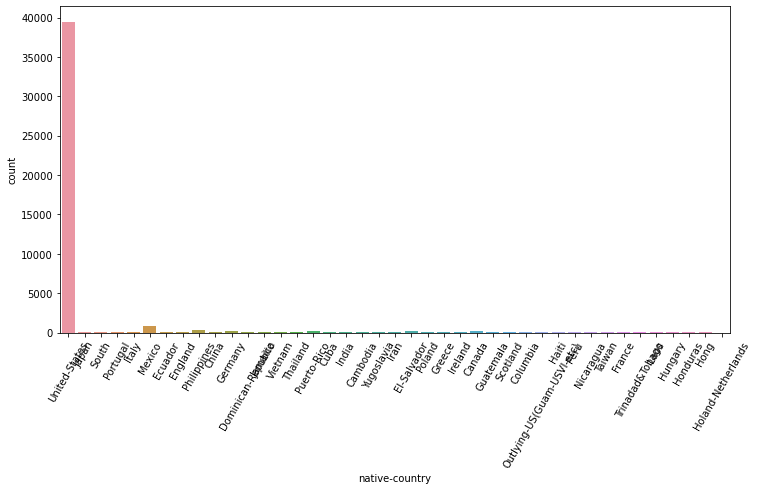

In [19]:
plt.figure(figsize = (12,6))
ax= sns.countplot(x='native-country', data=df_train)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
plt.show()

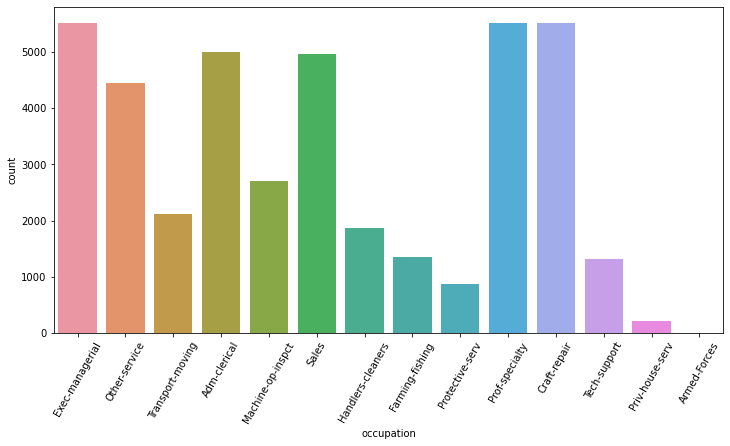

In [20]:
plt.figure(figsize = (12,6))
ax= sns.countplot(x='occupation', data=df_train)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
plt.show()

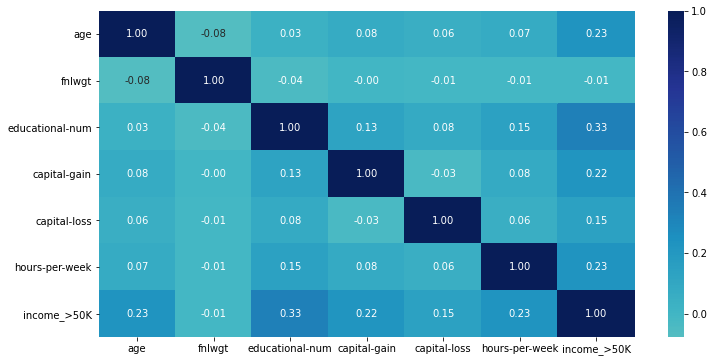

In [21]:
plt.figure(figsize = (12,6))
sns.heatmap(df_train.corr(), cmap='YlGnBu', annot=True, center=0, fmt='.2f')
plt.show()

### Limitations & conclusion for EDA step:
    1 - The Size of data is appropriate for analysis and modeling.
    2 - there are missingnes in 3 variables (workclass, occupation, native-country) also we figure out that missingness in workclass and occupation are totally dependent on each other.
    3- The target variable imbalanced to <= 50k
    4- The fnlwgt variable contains large values so i think it should be normalized
    5 - native_country variable contains 41 country but the US has the most of records so i think that data collected in us and i will delete the records for other countries

## Data cleaning and Feature Engineering

In [22]:
df = df_train.copy(deep=True)

In [23]:
## Handle missing values by dropping it
df.dropna(inplace=True)
df.isna().sum().sum()

0

In [24]:
## filter the data and keep US 
df = df[df['native-country'] == 'United-States']
df.shape

(37168, 15)

In [25]:
## Handle extreme values in 'capital-gain'
df[df['capital-gain'] < 30000]['capital-gain'].describe()

count    36963.000000
mean       602.009550
std       2543.668479
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      27828.000000
Name: capital-gain, dtype: float64

In [26]:
df['capital-gain'].describe()

count    37168.000000
mean      1145.108077
std       7742.115360
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [27]:
df.loc[df['capital-gain'] > 30000, 'capital-gain'] = df.loc[df['capital-gain'] < 30000, 'capital-gain'].mean()

In [28]:
df['capital-gain'].describe()

count    37168.000000
mean       602.009550
std       2536.643793
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      27828.000000
Name: capital-gain, dtype: float64

In [29]:
df2 = df.copy(deep=True)

In [30]:
## Convert categorical variables
df = pd.get_dummies(df, drop_first=True)

In [31]:
df.shape

(37168, 57)

## Modeling

In [32]:
X = df.drop('income_>50K', axis=1).values
y = df['income_>50K'].values

In [33]:
## split data to train and test
from sklearn.model_selection import train_test_split
X_tr, X_tes, y_tr, y_tes = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 1.KNN

In [34]:
## import KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

In [35]:
# neighbors = np.arange(1,9)
# train_accuracy = np.empty(len(neighbors))
# test_accuracy = np.empty(len(neighbors))
# for i, k in enumerate(neighbors):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_tr, y_tr)
#     train_accuracy[i] = knn.score(X_tr, y_tr)
#     test_accuracy[i] = knn.score(X_tes, y_tes)
    
# plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
# plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')

In [36]:
## instantiate the model and print the accuracy
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_tr, y_tr)
accuracy = knn.score(X_tes, y_tes)
accuracy

0.7768361581920904

#### Model Evaluation

In [37]:
## import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [38]:
## predict test set
y_pred = knn.predict(X_tes)

In [39]:
## print confusion matrix
con_matrix = confusion_matrix(y_tes,y_pred)
con_matrix

array([[5325,  224],
       [1435,  450]], dtype=int64)

In [40]:
## classification_report
report = classification_report(y_tes, y_pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report

,precision,recall,f1-score,support
0,0.787722,0.959632,0.865221,5549.000000
1,0.667656,0.238727,0.351700,1885.000000
accuracy,0.776836,0.776836,0.776836,0.776836
macro avg,0.727689,0.599180,0.608460,7434.000000
weighted avg,0.757277,0.776836,0.735010,7434.000000


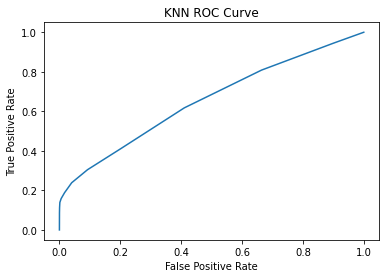

In [41]:
## plotting roc curve
y_pred_prob = knn.predict_proba(X_tes)[:,1]
fpr, tpr, thresholds = roc_curve(y_tes, y_pred_prob)
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.show()

In [42]:
## compute the area under the curve AUC
auc = roc_auc_score(y_tes, y_pred_prob)
auc

0.6532351516965085

#### Fine_tunning

In [43]:
## using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1, 12)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid=param_grid, cv=5)
knn_cv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])})

In [44]:
knn_cv.best_params_

{'n_neighbors': 10}

In [45]:
knn_cv.best_score_

0.7791110912764919

### 2.LogReg

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logreg = LogisticRegression()
logreg.fit(X_tr, y_tr)
accuracy = logreg.score(X_tes, y_tes)
accuracy

0.7827549098735539

#### Model Evaluation

In [48]:
log_pred = logreg.predict(X_tes)
con_matrix = confusion_matrix(y_tes, log_pred)
con_matrix

array([[5352,  197],
       [1418,  467]], dtype=int64)

In [49]:
## classification report
report = classification_report(y_tes, log_pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report

,precision,recall,f1-score,support
0,0.790547,0.964498,0.868902,5549.000000
1,0.703313,0.247745,0.366418,1885.000000
accuracy,0.782755,0.782755,0.782755,0.782755
macro avg,0.746930,0.606122,0.617660,7434.000000
weighted avg,0.768427,0.782755,0.741490,7434.000000


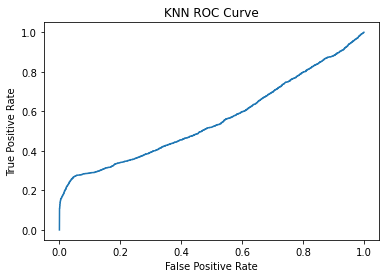

In [50]:
log_pred_prob = logreg.predict_proba(X_tes)[:,1]
fpr, tpr, thresholds = roc_curve(y_tes, log_pred_prob)
plt.plot(fpr, tpr, label='LogReg')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.show()

In [51]:
auc = roc_auc_score(y_tes, log_pred_prob)
auc

0.556707758656541

In [52]:
## GridSearchCV
param_grid = {'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 20), 'solver' : ['liblinear']}

In [53]:
logreg = LogisticRegression()
log_cv = GridSearchCV(logreg, param_grid=param_grid, cv=5)
log_cv.fit(X_tr, y_tr)
accuracy = log_cv.score(X_tes, y_tes)
accuracy

0.8403282216841539

In [54]:
log_cv.best_params_

{'C': 29.763514416313132, 'penalty': 'l1', 'solver': 'liblinear'}